Callum's Analysis of Dataset 3 & 4

The aim of this Data Analysis is to investigate the patterns between the average number of steps on weekends and weekdays.

The below code imports all relevant libraries, and handles the initial loading of the datasets

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

#Import the Data
dataset3 = pd.read_csv("../../../datasets/Participant-03.csv")
dataset4 = pd.read_csv("../../../datasets/Participant-04.csv")

#rename Columns names to uniform standard
dataset3.rename(columns = {"Steps (count)": "Steps"}, inplace = True)
dataset4.rename(columns = {"Steps (count)": "Steps"}, inplace = True)


#Drop any rows with null Values, and print the head and tail of the dataset for intial investigation
# dataset3.dropna()
# dataset4.dropna() 


The above results show the shape of the data (6020 records), as well as the makeup of the inputed columns, especially the Start and End columns, which will be reformatted in the next section. 

The goal of the next section is to investigate whether there are board trends based on days of the week in terms of steps taken.

In [2]:
#Transform String into DataTime format for Start and Finish Columns
dataset3['Start'] = pd.to_datetime( dataset3['Start'], infer_datetime_format = True)
dataset3['Finish'] = pd.to_datetime( dataset3['Finish'], infer_datetime_format = True)

dataset4['Start'] = pd.to_datetime( dataset4['Start'], infer_datetime_format = True)
dataset4['Finish'] = pd.to_datetime( dataset4['Finish'], infer_datetime_format = True)

#Create a new column with the starting day of each sample 1 hours period
dataset3['Day'] = dataset3['Start'].dt.day_of_week
dataset4['Day'] = dataset4['Start'].dt.day_of_week

#Creates an hour column, ranging from 0 to 23
dataset3['Hour'] = dataset3['Start'].dt.hour
dataset4['Hour'] = dataset4['Start'].dt.hour

#seperate both datasets into weekend and weekday subsets
weekdays3 = dataset3[(dataset3['Day'] != 6) & (dataset3['Day'] != 7)]
weekends3 = dataset3[(dataset3['Day'] == 6) | (dataset3['Day'] == 7)]
#TODO make 0-6 into mon-sun

weekdays4 = dataset4[(dataset4['Day'] != 6) & (dataset4['Day'] != 7)]
weekends4 = dataset4[(dataset4['Day'] == 6) | (dataset4['Day'] == 7)]


<AxesSubplot:xlabel='Hour', ylabel='Steps'>

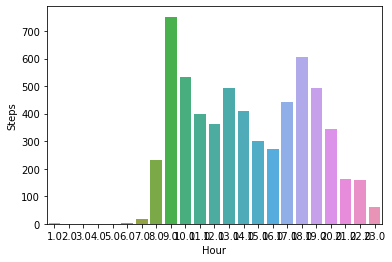

In [8]:
#perform t-test on participant-3 dataset between the weekend and weekday means 
ttest_ind(weekdays3['Steps'], weekends3['Steps'], equal_var=False)

#Weekdays
hour_weekdays3 = weekdays3.groupby(['Hour'])['Steps'].mean().to_frame()
hour_weekdays3['Hour'] = pd.Series(range(1,24))

#Weekends
hour_weekends3 = weekends3.groupby(['Hour'])['Steps'].mean().to_frame()
hour_weekends3['Hour'] = pd.Series(range(1,24))

#Plots
sns.barplot(data=hour_weekends3, x="Hour", y="Steps")
sns.barplot(data=hour_weekdays3, x="Hour", y="Steps")

<AxesSubplot:xlabel='Hour', ylabel='Steps'>

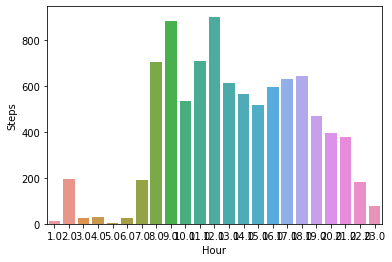

In [10]:
#perform t-test on participant-4 dataset between the weekend and weekday means 
ttest_ind(weekdays4['Steps'], weekends4['Steps'], equal_var=False)

#TODO sort out this code, instead of adding a new column, get back the column that was initially defaulted to be the index

#Weekdays
hour_weekdays4 = weekdays4.groupby(['Hour'])['Steps'].mean().to_frame()
hour_weekdays4['Hour'] = pd.Series(range(1,24))

#Weekends
hour_weekends4 = weekends4.groupby(['Hour'])['Steps'].mean().to_frame()
hour_weekends4['Hour'] = pd.Series(range(1,24))

#Plots
sns.barplot(data=hour_weekends4, x="Hour", y="Steps")


<AxesSubplot:xlabel='Hour', ylabel='Steps'>

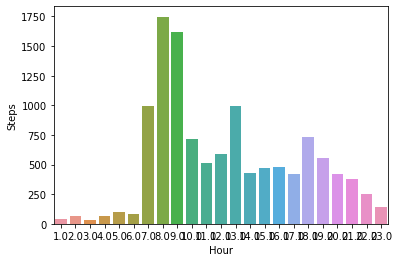

In [9]:
sns.barplot(data=hour_weekdays4, x="Hour", y="Steps")

As both p-values are less than 0.05, therefore there is a statistically significant difference between the mean steps taken on weekdays and weekends.

These results show that there is a significant difference across the different days, with a clear dip during Saturday and Sunday, with a mid-week "hump" in the number of steps walked. This lines up with previous literature on the subject. This initial Analysis informs the further questions that can be tested on this dataset, including why there is such a large weekend reduction, and why wednesday is the most active. Whether these trends hold across seasons may be another question for our research.

In [5]:
#TODO Add graph comparing hourly differences between weekends and weekdays
#TODO Add priors for tests/graphs
#TODO Add participant-08 dataset
#TODO make 0-6 into mon-sun